In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [ ]:
from google.colab import files
uploaded = files.upload()
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

Saving Index2018.csv to Index2018.csv


In [ ]:
df_comp['market_value']=df_comp.ftse
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
df['returns'] = df.market_value.pct_change(1)*100

In [ ]:
import statsmodels.api as sm
model_ret_ar_1_ma_1 = sm.tsa.ARIMA(df.returns[1:], order=(1,0,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7916.500
Date:                Fri, 22 Sep 2023   AIC                          15841.000
Time:                        20:26:54   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1          0.7650      0.045     16.995      0.000       0.677       0.853
ma.L1         -0.8142      0.040    -20.187      0.000      -0.893      -0.735
sigma2         1.3718      0.014     98.110      0.000       1.344       1.399
===================================================================================
Ljung-Box (L1) (Q):                   2.06   Jarque-Bera (JB):              7488.92
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_1 = sm.tsa.ARIMA(df.returns[1:], order = (1,0,0))
model_ret_ma_1 = sm.tsa.ARIMA(df.returns[1:], order = (0,0,1))

In [ ]:
print("\nARMA vs AR ", LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1))
print("\nARMA vs MA ", LLR_test(model_ret_ma_1, model_ret_ar_1_ma_1))


ARMA vs AR  0.0

ARMA vs MA  0.0


In [ ]:
model_ret_ar_3_ma_3 = sm.tsa.ARIMA(df.returns[1:], order=(3,0,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()

In [ ]:
LLR_test(model_ret_ar_1_ma_1, model_ret_ar_3_ma_3, DF = 4)

0.0

In [ ]:
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -7893.515
Date:                Fri, 22 Sep 2023   AIC                          15803.030
Time:                        20:32:39   BIC                          15855.200
Sample:                    01-10-1994   HQIC                         15821.311
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.281      0.200      -0.010       0.048
ar.L1         -0.1880      0.068     -2.780      0.005      -0.321      -0.055
ar.L2         -0.2926      0.054     -5.380      0.000      -0.399      -0.186
ar.L3          0.4469      0.062      7.252      0.000       0.326       0.568
ma.L1          0.1690      0.063      2.686      0.007       0.046       0.292
ma.L2          0.2260      0.052      4.328      0.000       0.124       0.328
ma.L3         -0.5442      0.056     -9.632      0.000      -0.655      -0.433
sigma2         1.3591      0.015     92.543      0.000       1.330       1.388
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):              6862.43
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_3_ma_2 = sm.tsa.ARIMA(df.returns[1:], order=(3,0,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -7895.747
Date:                Fri, 22 Sep 2023   AIC                          15805.495
Time:                        20:37:36   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.211      0.226      -0.012       0.049
ar.L1         -0.6778      0.055    -12.298      0.000      -0.786      -0.570
ar.L2         -0.5082      0.063     -8.035      0.000      -0.632      -0.384
ar.L3         -0.1141      0.009    -12.755      0.000      -0.132      -0.097
ma.L1          0.6561      0.056     11.747      0.000       0.547       0.766
ma.L2          0.4468      0.064      7.031      0.000       0.322       0.571
sigma2         1.3604      0.015     91.796      0.000       1.331       1.389
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6513.61
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_2_ma_3 = sm.tsa.ARIMA(df.returns[1:], order=(2,0,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -7895.587
Date:                Fri, 22 Sep 2023   AIC                          15805.175
Time:                        20:37:52   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.015      1.224      0.221      -0.011       0.049
ar.L1         -0.5600      0.057     -9.777      0.000      -0.672      -0.448
ar.L2         -0.4178      0.065     -6.381      0.000      -0.546      -0.289
ma.L1          0.5373      0.057      9.417      0.000       0.425       0.649
ma.L2          0.3531      0.066      5.383      0.000       0.225       0.482
ma.L3         -0.1159      0.009    -12.679      0.000      -0.134      -0.098
sigma2         1.3604      0.015     91.315      0.000       1.331       1.390
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6515.27
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(model_ret_ar_2_ma_3, model_ret_ar_3_ma_3)

0.042

In [ ]:
model_ret_ar_3_ma_1 = sm.tsa.ARIMA(df.returns[1:], order=(3,0,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -7899.072
Date:                Fri, 22 Sep 2023   AIC                          15810.144
Time:                        20:38:34   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.248      0.212      -0.011       0.048
ar.L1         -0.5074      0.062     -8.155      0.000      -0.629      -0.385
ar.L2         -0.0638      0.009     -7.027      0.000      -0.082      -0.046
ar.L3         -0.1102      0.008    -13.610      0.000      -0.126      -0.094
ma.L1          0.4836      0.064      7.608      0.000       0.359       0.608
sigma2         1.3623      0.015     92.782      0.000       1.334       1.391
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6490.60
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)

0.01

In [ ]:
model_ret_ar_2_ma_2 = sm.tsa.ARIMA(df.returns[1:], order=(2,0,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -7914.692
Date:                Fri, 22 Sep 2023   AIC                          15841.384
Time:                        20:39:14   BIC                          15880.511
Sample:                    01-10-1994   HQIC                         15855.095
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1         -0.0969      0.091     -1.068      0.286      -0.275       0.081
ar.L2          0.6975      0.066     10.509      0.000       0.567       0.828
ma.L1          0.0399      0.092      0.435      0.663      -0.140       0.220
ma.L2         -0.7259      0.071    -10.274      0.000      -0.864      -0.587
sigma2         1.3708      0.014     95.248      0.000       1.343       1.399
===================================================================================
Ljung-Box (L1) (Q):                   4.33   Jarque-Bera (JB):              7237.20
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_1_ma_3 = sm.tsa.ARIMA(df.returns[1:], order=(1,0,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -7896.838
Date:                Fri, 22 Sep 2023   AIC                          15805.676
Time:                        20:39:19   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.265      0.206      -0.010       0.048
ar.L1         -0.4693      0.060     -7.878      0.000      -0.586      -0.353
ma.L1          0.4469      0.060      7.437      0.000       0.329       0.565
ma.L2         -0.0637      0.009     -7.277      0.000      -0.081      -0.047
ma.L3         -0.1182      0.008    -14.693      0.000      -0.134      -0.102
sigma2         1.3610      0.015     92.540      0.000       1.332       1.390
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6401.49
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print("\n ARMA(3,2): \tLL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)
print("\n ARMA(1,3): \tLL = ", results_ret_ar_1_ma_3.llf, "\tAIC = ", results_ret_ar_1_ma_3.aic)


 ARMA(3,2): 	LL =  -7895.747490025735 	AIC =  15805.49498005147

 ARMA(1,3): 	LL =  -7896.83790920579 	AIC =  15805.67581841158


In [ ]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]

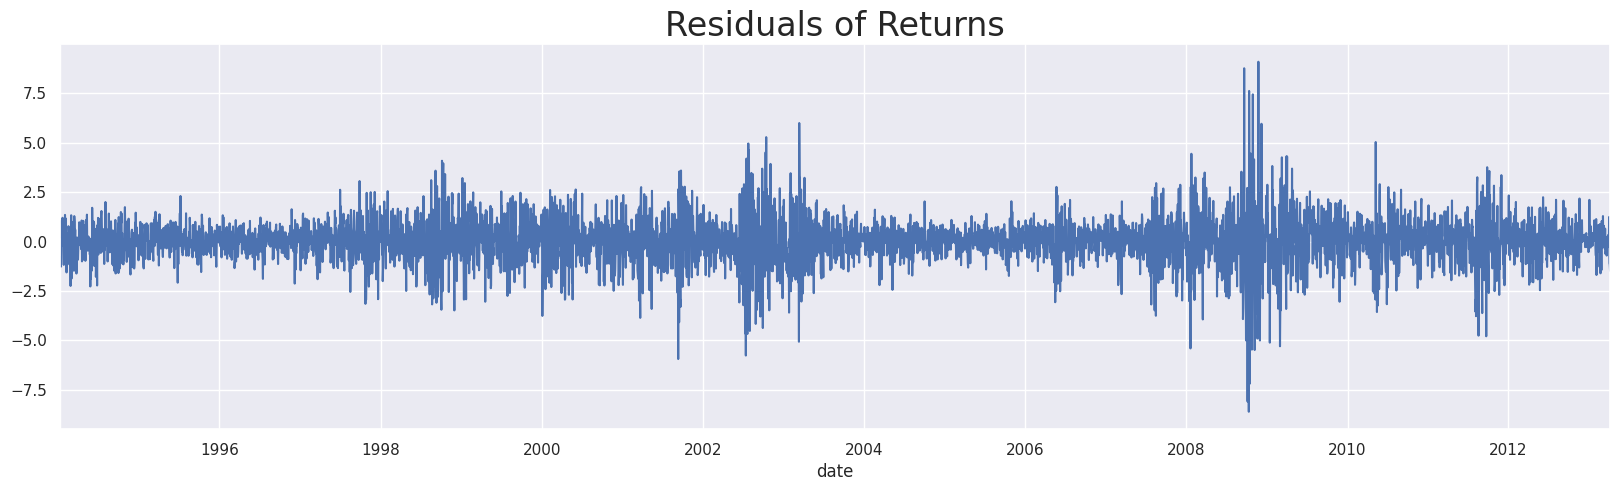

In [ ]:
df.res_ret_ar_3_ma_2.plot(figsize = (20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

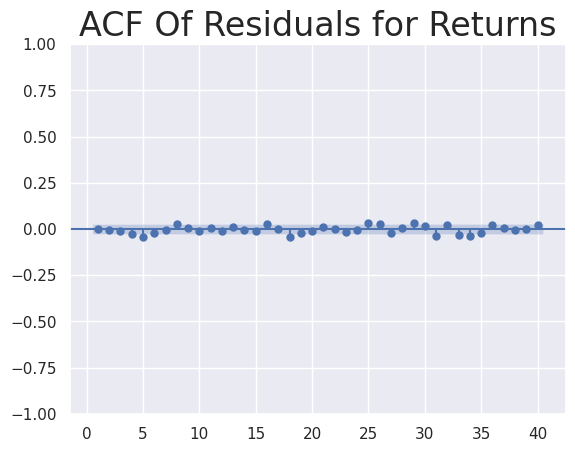

In [ ]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()


In [ ]:
model_ret_ar_5_ma_5 = sm.tsa.ARIMA(df.returns[1:], order=(5,0,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -7882.752
Date:                Fri, 22 Sep 2023   AIC                          15789.504
Time:                        20:40:26   BIC                          15867.758
Sample:                    01-10-1994   HQIC                         15816.925
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0209      0.015      1.408      0.159      -0.008       0.050
ar.L1         -0.0894      0.117     -0.765      0.444      -0.318       0.140
ar.L2         -0.5564      0.081     -6.851      0.000      -0.716      -0.397
ar.L3         -0.1311      0.077     -1.712      0.087      -0.281       0.019
ar.L4          0.2494      0.073      3.408      0.001       0.106       0.393
ar.L5          0.1028      0.090      1.145      0.252      -0.073       0.279
ma.L1          0.0661      0.117      0.567      0.571      -0.162       0.295
ma.L2          0.5060      0.081      6.237      0.000       0.347       0.665
ma.L3          0.0314      0.074      0.426      0.670      -0.113       0.176
ma.L4         -0.2371      0.071     -3.353      0.001      -0.376      -0.099
ma.L5         -0.1971      0.085     -2.310      0.021      -0.364      -0.030
sigma2         1.3544      0.015     90.056      0.000       1.325       1.384
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6384.35
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_5_ma_1 = sm.tsa.ARIMA(df.returns[1:], order=(5,0,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -7889.311
Date:                Fri, 22 Sep 2023   AIC                          15794.623
Time:                        20:40:37   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.301      0.193      -0.010       0.047
ar.L1          0.3449      0.105      3.270      0.001       0.138       0.552
ar.L2         -0.0458      0.009     -4.852      0.000      -0.064      -0.027
ar.L3         -0.0651      0.010     -6.435      0.000      -0.085      -0.045
ar.L4          0.0742      0.012      6.092      0.000       0.050       0.098
ar.L5         -0.0813      0.009     -9.480      0.000      -0.098      -0.064
ma.L1         -0.3682      0.106     -3.461      0.001      -0.577      -0.160
sigma2         1.3570      0.015     92.269      0.000       1.328       1.386
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6468.96
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_1_ma_5 = sm.tsa.ARIMA(df.returns[1:], order=(1,0,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
results_ret_ar_1_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -7890.974
Date:                Fri, 22 Sep 2023   AIC                          15797.949
Time:                        20:40:42   BIC                          15850.118
Sample:                    01-10-1994   HQIC                         15816.230
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.297      0.194      -0.010       0.047
ar.L1          0.3218      0.133      2.415      0.016       0.061       0.583
ma.L1         -0.3467      0.134     -2.593      0.010      -0.609      -0.085
ma.L2         -0.0406      0.010     -4.157      0.000      -0.060      -0.021
ma.L3         -0.0682      0.011     -6.099      0.000      -0.090      -0.046
ma.L4          0.0736      0.015      5.012      0.000       0.045       0.102
ma.L5         -0.0682      0.009     -7.411      0.000      -0.086      -0.050
sigma2         1.3579      0.015     91.599      0.000       1.329       1.387
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6465.72
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print("ARMA(5,1):  \t LL = ",results_ret_ar_5_ma_1.llf,"\t AIC = ",results_ret_ar_5_ma_1.aic)
print("ARMA(1,5):  \t LL = ",results_ret_ar_1_ma_5.llf,"\t AIC = ",results_ret_ar_1_ma_5.aic)

ARMA(5,1):  	 LL =  -7889.311305453215 	 AIC =  15794.62261090643
ARMA(1,5):  	 LL =  -7890.974434537854 	 AIC =  15797.948869075708


In [ ]:
print("ARMA(3,2):  \t LL = ",results_ret_ar_3_ma_2.llf,"\t AIC = ",results_ret_ar_3_ma_2.aic)

ARMA(3,2):  	 LL =  -7895.747490025735 	 AIC =  15805.49498005147


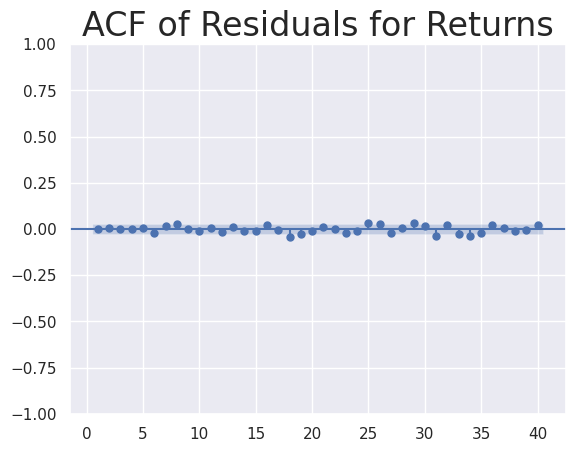

In [ ]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid
sgt.plot_acf(df.res_ret_ar_5_ma_1[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for Returns",size=24)
plt.show()

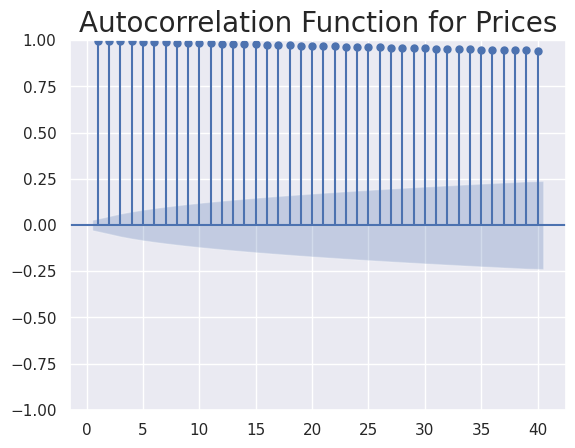

In [ ]:
sgt.plot_acf(df.market_value, unbiased=True, zero = False, lags = 40)
plt.title("Autocorrelation Function for Prices",size=20)
plt.show()

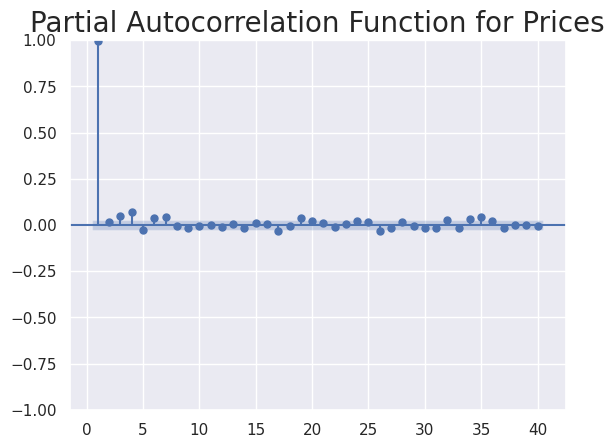

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("Partial Autocorrelation Function for Prices",size=20)
plt.show()

In [ ]:
model_ar_1_ma_1 = sm.tsa.ARIMA(df.market_value, order=(1,0,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27621.875
Date:                Fri, 22 Sep 2023   AIC                          55251.749
Time:                        20:41:02   BIC                          55277.835
Sample:                    01-07-1994   HQIC                         55260.890
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    366.501     13.887      0.000    4371.312    5807.970
ar.L1          0.9982      0.001   1189.159      0.000       0.997       1.000
ma.L1         -0.0186      0.010     -1.894      0.058      -0.038       0.001
sigma2      3510.8350     41.068     85.489      0.000    3430.344    3591.326
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3280.53
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

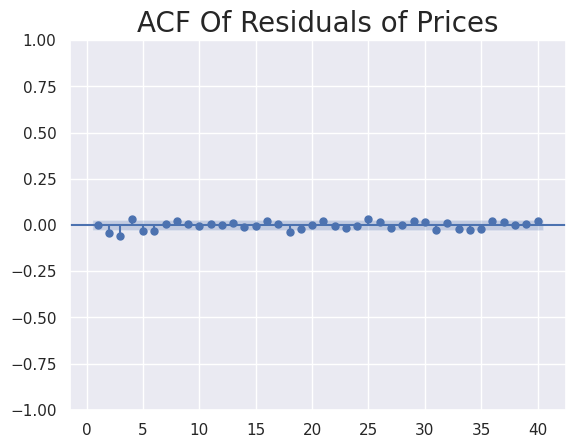

In [ ]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

In [ ]:
model_ar_6_ma_6 = sm.tsa.ARIMA(df.market_value, order=(6,0,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit()
results_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 6)   Log Likelihood              -27591.277
Date:                Fri, 22 Sep 2023   AIC                          55210.553
Time:                        20:45:10   BIC                          55301.853
Sample:                    01-07-1994   HQIC                         55242.546
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6408    511.853      9.944      0.000    4086.428    6092.853
ar.L1          0.7382      0.927      0.796      0.426      -1.078       2.555
ar.L2          0.2445      1.556      0.157      0.875      -2.805       3.294
ar.L3         -0.4062      1.223     -0.332      0.740      -2.803       1.991
ar.L4          0.3422      0.759      0.451      0.652      -1.145       1.830
ar.L5         -0.1101      0.418     -0.263      0.792      -0.930       0.710
ar.L6          0.1892      0.254      0.746      0.456      -0.308       0.687
ma.L1          0.2406      0.927      0.260      0.795      -1.575       2.057
ma.L2         -0.0390      0.668     -0.058      0.953      -1.348       1.270
ma.L3          0.3344      0.563      0.594      0.552      -0.769       1.437
ma.L4          0.0823      0.243      0.339      0.735      -0.394       0.559
ma.L5          0.1450      0.301      0.482      0.630      -0.444       0.734
ma.L6         -0.0865      0.085     -1.016      0.310      -0.253       0.080
sigma2      3468.7408     43.249     80.204      0.000    3383.975    3553.507
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2960.94
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar_5_ma_6 = sm.tsa.ARIMA(df.market_value, order=(5,0,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit()
results_ar_5_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 0, 6)   Log Likelihood              -27589.851
Date:                Fri, 22 Sep 2023   AIC                          55205.703
Time:                        20:47:25   BIC                          55290.481
Sample:                    01-07-1994   HQIC                         55235.410
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6408   1620.722      3.140      0.002    1913.085    8266.197
ar.L1          0.6072      0.619      0.980      0.327      -0.607       1.821
ar.L2         -0.2239      0.705     -0.318      0.751      -1.605       1.157
ar.L3          0.1461      0.607      0.240      0.810      -1.044       1.337
ar.L4          0.5846      0.498      1.173      0.241      -0.392       1.561
ar.L5         -0.1149      0.107     -1.074      0.283      -0.324       0.095
ma.L1          0.3721      0.619      0.602      0.547      -0.840       1.584
ma.L2          0.5591      0.152      3.684      0.000       0.262       0.857
ma.L3          0.3628      0.492      0.737      0.461      -0.602       1.328
ma.L4         -0.1578      0.102     -1.553      0.120      -0.357       0.041
ma.L5         -0.0842      0.013     -6.348      0.000      -0.110      -0.058
ma.L6         -0.0520      0.059     -0.879      0.379      -0.168       0.064
sigma2      3466.5040     42.270     82.009      0.000    3383.657    3549.351
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3043.54
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar_6_ma_1 = sm.tsa.ARIMA(df.market_value, order=(6,0,1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit()
results_ar_6_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 1)   Log Likelihood              -27594.195
Date:                Fri, 22 Sep 2023   AIC                          55206.390
Time:                        20:47:57   BIC                          55265.082
Sample:                    01-07-1994   HQIC                         55226.956
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6310    525.543      9.685      0.000    4059.585    6119.677
ar.L1          1.3884      0.158      8.793      0.000       1.079       1.698
ar.L2         -0.4332      0.154     -2.812      0.005      -0.735      -0.131
ar.L3         -0.0103      0.017     -0.619      0.536      -0.043       0.022
ar.L4          0.1125      0.016      6.905      0.000       0.081       0.144
ar.L5         -0.1154      0.020     -5.695      0.000      -0.155      -0.076
ar.L6          0.0573      0.009      6.193      0.000       0.039       0.075
ma.L1         -0.4089      0.158     -2.582      0.010      -0.719      -0.098
sigma2      3471.4062     42.110     82.437      0.000    3388.873    3553.940
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3031.82
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(6,1):  \t LL = ", results_ar_6_ma_1.llf, "\t AIC = ", results_ar_6_ma_1.aic)


ARMA(5,6):  	 LL =  -27589.851402209897 	 AIC =  55205.702804419794
ARMA(6,1):  	 LL =  -27594.194889384184 	 AIC =  55206.38977876837


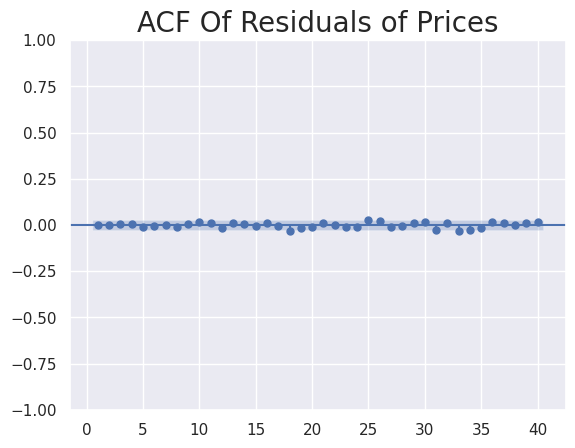

In [ ]:
df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid
sgt.plot_acf(df.res_ar_5_ma_6, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

In [ ]:
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(5,1):  \t LL = ", results_ret_ar_5_ma_1.llf, "\t AIC = ", results_ret_ar_5_ma_1.aic)


ARMA(5,6):  	 LL =  -27589.851402209897 	 AIC =  55205.702804419794
ARMA(5,1):  	 LL =  -7889.311305453215 	 AIC =  15794.62261090643
